In [35]:
########### Include season in the linear regression 

library(dplyr)
library(lubridate)
library(ggplot2)
library(forecast)


In [24]:
install.packages("zoo")
library(zoo)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [27]:
install.packages("forecast")
library(forecast)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [28]:
library(forecast)

In [29]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [30]:
Temperatures <- read.csv("daily-minimum-temperatures-in-me.csv", stringsAsFactors = FALSE)
head(Temperatures)


Date,Daily.minimum.temperatures.in.Melbourne..Australia..1981.1990
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8


In [31]:
colnames(Temperatures) <- c("Date", "Temperature")

# First we have to change the date to POSIXct
Temperatures$Date <- strptime(Temperatures$Date, "%Y-%m-%d" )
Temperatures$Date <- as.POSIXct(Temperatures$Date)
Temperatures$Temperature <- as.numeric(Temperatures$Temperature)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [32]:
# Let's check the structure of the table
str(Temperatures)

# Now we create different columns for different time configurations
# Month
Temperatures <- mutate(Temperatures, MonthYear = paste(year(Date),formatC(month(Date), width = 2, flag = "0")))

# Day of the week
Temperatures <- mutate(Temperatures, Yearday = paste(year(Date), formatC(month(Date), width = 2, flag = "0"),
                                                     formatC(day(Date), width = 2, flag = "0")))



'data.frame':	3652 obs. of  2 variables:
 $ Date       : POSIXct, format: "1981-01-01" "1981-01-02" ...
 $ Temperature: num  20.7 17.9 18.8 14.6 15.8 15.8 15.8 17.4 21.8 20 ...


In [33]:
# Week of the year
Temperatures <- mutate(Temperatures, Week = week(Date))

# Year
Temperatures <- mutate(Temperatures, Year = year(Date))
Temperatures$Year <- as.factor(Temperatures$Year)
# Let's check the structure of the table
str(Temperatures)


'data.frame':	3652 obs. of  6 variables:
 $ Date       : POSIXct, format: "1981-01-01" "1981-01-02" ...
 $ Temperature: num  20.7 17.9 18.8 14.6 15.8 15.8 15.8 17.4 21.8 20 ...
 $ MonthYear  : chr  "1981 01" "1981 01" "1981 01" "1981 01" ...
 $ Yearday    : chr  "1981 01 01" "1981 01 02" "1981 01 03" "1981 01 04" ...
 $ Week       : num  1 1 1 1 1 1 1 2 2 2 ...
 $ Year       : Factor w/ 10 levels "1981","1982",..: 1 1 1 1 1 1 1 1 1 1 ...


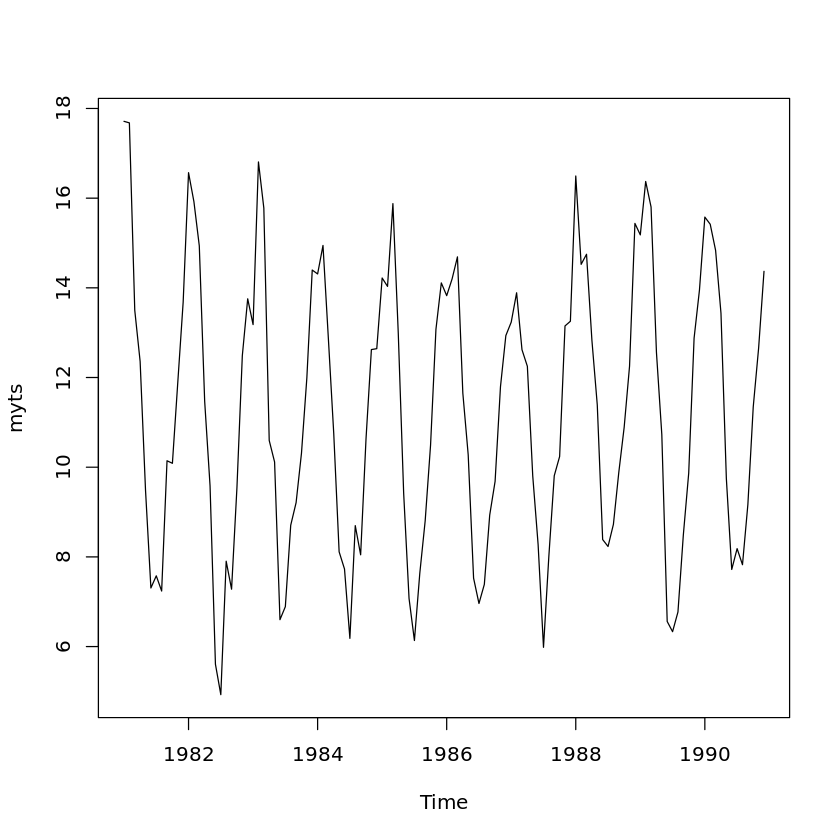

In [14]:
# First we need to use the year column to aggregate
Temps_month <- aggregate(Temperatures$Temperature, by = list(Temperatures$MonthYear), FUN = function(x) mean(x, na.rm=T))

# Now we create the time series adding the right period
# It's better to define the end of the time series if it's not at the end of one year
myts <- ts(Temps_month$x, frequency=12, start = c(1981, 01), end = c(1990, 12))
plot(myts)


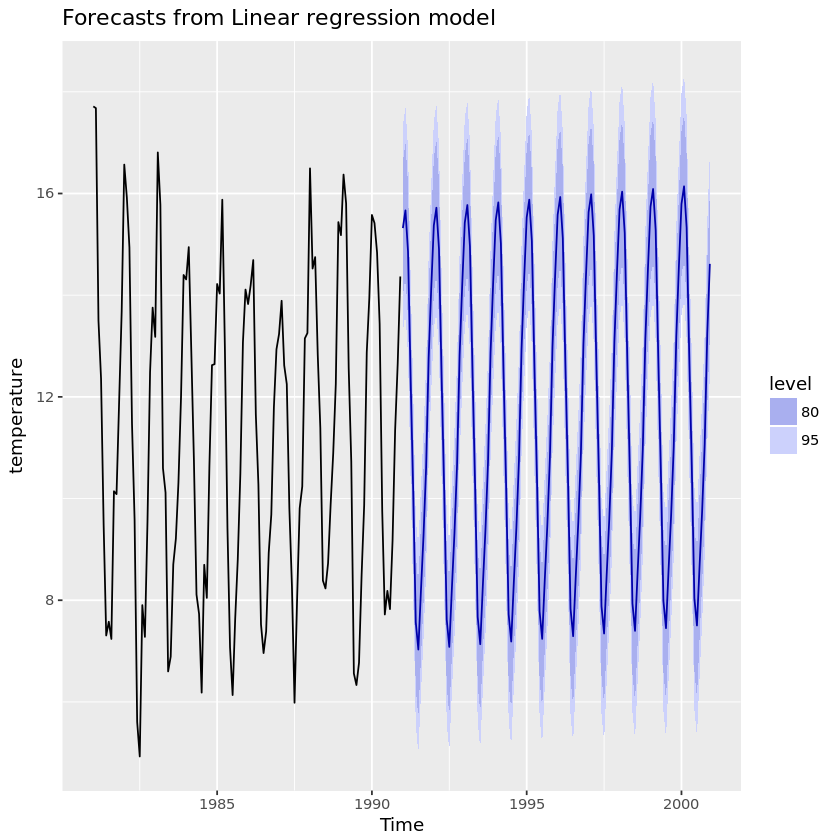

In [34]:
# We need to create a data frame in order to use this function
# The first column of this df should be the time series
# The second one should be the numerical value of time
my_df_ts <- data.frame(temperature = myts, as.numeric(time(myts)))
names(my_df_ts) <- c("temperature", "time")

# Then we can create a model using tslm
# We can model using trend, season and random
mymodel <- tslm(temperature~season+trend,my_df_ts)

# And forecast using this same model
# We are going to predict the next 10 years
# We can see the ascending trend
my_fc <- forecast(mymodel,h=120)
autoplot(my_fc)
